In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np
import scipy
from scipy.stats import gamma

def sample_from_gamma(n, a, scale):   
    return scipy.stats.gamma.ppf(np.random.random(n), a=a, scale=scale)

def generate_sim(mixing_proportion, n, a1, scale1, a2, scale2):

    all_vals1 = sample_from_gamma(int(n*mixing_proportion),
                                  a=a1, scale=scale1)
    all_vals2 = sample_from_gamma(int(n*(1-mixing_proportion)),
                                  a=a2, scale=scale2)

    all_vals = []
    all_vals.extend(all_vals1)
    all_vals.extend(all_vals2)
    return np.array(all_vals)

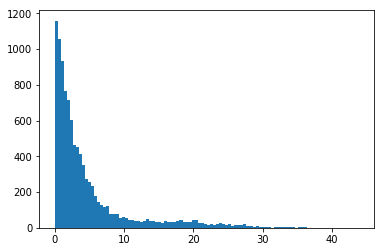

In [3]:
mixing_proportion = 0.9
n = 10000

a1 = 1
scale1 = 3
a2 = 10
scale2 = 2

all_vals = generate_sim(mixing_proportion=mixing_proportion,
                      n=n,
                      a1=a1,
                      scale1=scale1,
                      a2=a2,
                      scale2=scale2)

%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(all_vals, bins=100)
plt.show()

In [4]:
import sys
sys.path.insert(-1,"../../modisco")
import gammamix
results = gammamix.gammamix_em(all_vals, mix_prop=np.array([0.9, 0.1]), verb=True)

initial vals: [0.9 0.1] [ 1.15888088 14.59281898] [0.39067239 0.71360545] 2
iteration = 1 log-lik diff = 17507.1311687752  log-lik = -25295.27552128599
iteration = 2 log-lik diff = 237.86217844858766  log-lik = -25057.4133428374
iteration = 3 log-lik diff = 67.08711097253763  log-lik = -24990.326231864863
iteration = 4 log-lik diff = 27.09756832632047  log-lik = -24963.228663538543
iteration = 5 log-lik diff = 12.863851374826481  log-lik = -24950.364812163716
iteration = 6 log-lik diff = 6.718761320596968  log-lik = -24943.64605084312
iteration = 7 log-lik diff = 3.7579038054464036  log-lik = -24939.888147037673
iteration = 8 log-lik diff = 2.231862868062308  log-lik = -24937.65628416961
iteration = 9 log-lik diff = 1.4096352082051453  log-lik = -24936.246648961405
iteration = 10 log-lik diff = 0.9534307807625737  log-lik = -24935.293218180643
iteration = 11 log-lik diff = 0.6978542044562346  log-lik = -24934.595363976186
iteration = 12 log-lik diff = 0.5489931881093071  log-lik = -249

MixParams(mix_prop=array([0.89851561, 0.10148439]), alpha=array([ 1.02242699, 10.90110236]), invbeta=array([2.9469309 , 1.81447357]), k=2)


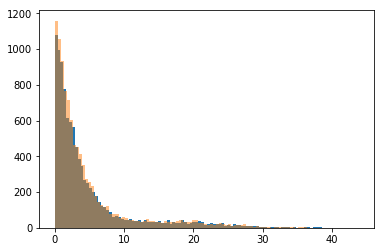

In [7]:
print(results.params)
plt.hist(generate_sim(mixing_proportion=results[0].mix_prop[0],
                      n=n,
                      a1=results[0].alpha[0],
                      scale1=(results[0].invbeta[0]),
                      a2=results[0].alpha[1],
                      scale2=(results[0].invbeta[1])), bins=100)
plt.hist(all_vals,alpha=0.5, bins=100)
plt.show()